# Plotting some figures 

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib.pyplot as plt

sys.path.insert(0, '../../../icenumerics/')
sys.path.insert(0, '../auxnumerics/')
sys.path.insert(0, '../')

import icenumerics as ice
import auxiliary as aux

from parameters import params

%reload_ext autoreload
%autoreload 2

ureg = ice.ureg
idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [7]:
DATA_PATH = '../../data/test11'
MOUNT_DRIVE = '/home/frieren/BIG/'
PROJECT = 'reentrancy'
DATA_PATH = os.path.join(MOUNT_DRIVE, PROJECT,'test11')

## Sanity check

Just checking the the field profile is correct

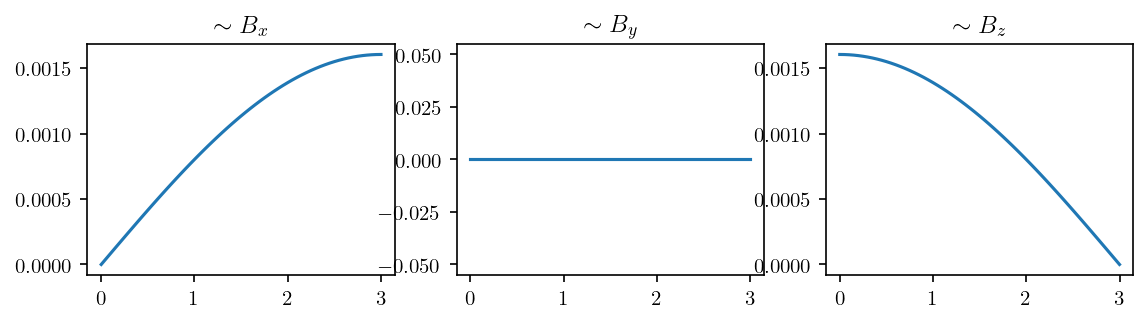

In [10]:
ctrj_raw = pd.read_csv(os.path.join(DATA_PATH,'10','3','20mT/trj10.csv'), index_col=[0,1])

fig, axes = plt.subplots(1,3,figsize=(9,2),dpi=150)

ax = axes[0]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"mux"]))
ax.set_title("$\\sim B_x$")

ax = axes[1]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muy"]))
ax.set_title("$\\sim B_y$")

ax = axes[2]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muz"]))
ax.set_title("$\\sim B_z$")

plt.show()


## Counts vs angle (time)

In [19]:
# load the csv that has all counts for all total time (omega vals)
# and the complete timeseries
raw_data = pd.read_csv(os.path.join(DATA_PATH,'10','average_counts.csv'),index_col=['field','time'])

# compute the omega values, and theta as well
omega = np.pi/2/raw_data.total_time.to_numpy()

# append omega and theta to the df
raw_data['omega'] = np.around(omega,4)
raw_data['theta'] = raw_data.index.get_level_values('time') * raw_data.omega
raw_data

I     II    III     IV      V     VI  total_time   omega  \
field time                                                                  
20    0.00   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
      0.05   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
      0.10   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
      0.15   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
      0.20   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
...            ...    ...    ...    ...    ...    ...         ...     ...   
10    99.75  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   
      99.80  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   
      99.85  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   
      99.90  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   
      99.95  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   

                theta  
field time             
20    0.00   0.000000  
      0.05   0.078540  
      0.10   0.157080  
      0.15   0.235620  
      0.20   0.314160  
...               ...  
10    99.75  1.566075  
      99.80  1.566860  
      99.85  1.567645  
      99.90  1.568430  
      99.95  1.569215  

[281400 rows x 9 columns]

In [27]:
ws = raw_data.omega.unique()
ws = ws[ws <= 0.2]
print('selected values:')
print(ws)

selected values:
[0.1963 0.1745 0.1571 0.1428 0.1309 0.1208 0.1122 0.1047 0.0982 0.0924
 0.0873 0.0827 0.0785 0.0524 0.0393 0.0314 0.0224 0.0196 0.0175 0.0157]


In [25]:
def plot_simple_colloids(ax, title, centers, dirs, sep=1/9, scale=1/2):
    for c,d in zip(centers,dirs):
        atom = (c+sep*d)*scale
        trap = (c-sep*d)*scale
        ax.scatter(*atom,c='#c02a2e',s=50)
        ax.scatter(*trap,c='#b1bfb3',s=50)
        ax.set_title(title)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_xlim(xlim[0] - 0.05, xlim[1] + 0.05)
    ax.set_ylim(ylim[0] - 0.05, ylim[1] + 0.05)

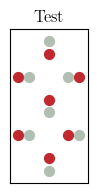

In [26]:
fig, ax = plt.subplots(figsize=(1,2))
centers = np.array([[0,0],[1,0],[1/2,1/2],[1/2,-1/2],[1/2,3/2],[0,1],[1,1]])
af4 = np.array([[1,0],[-1,0],[0,-1],[0,1],[0,1],[-1,0],[1,0]])
af2 = np.array([[-1,0],[-1,0],[0,-1],[0,1],[0,1],[1,0],[1,0]])
zero = np.array([[-1,0],[-1,0],[0,1],[0,1],[0,-1],[-1,0],[1,0]])

plot_simple_colloids(ax,'Test',centers,zero)
plt.show()

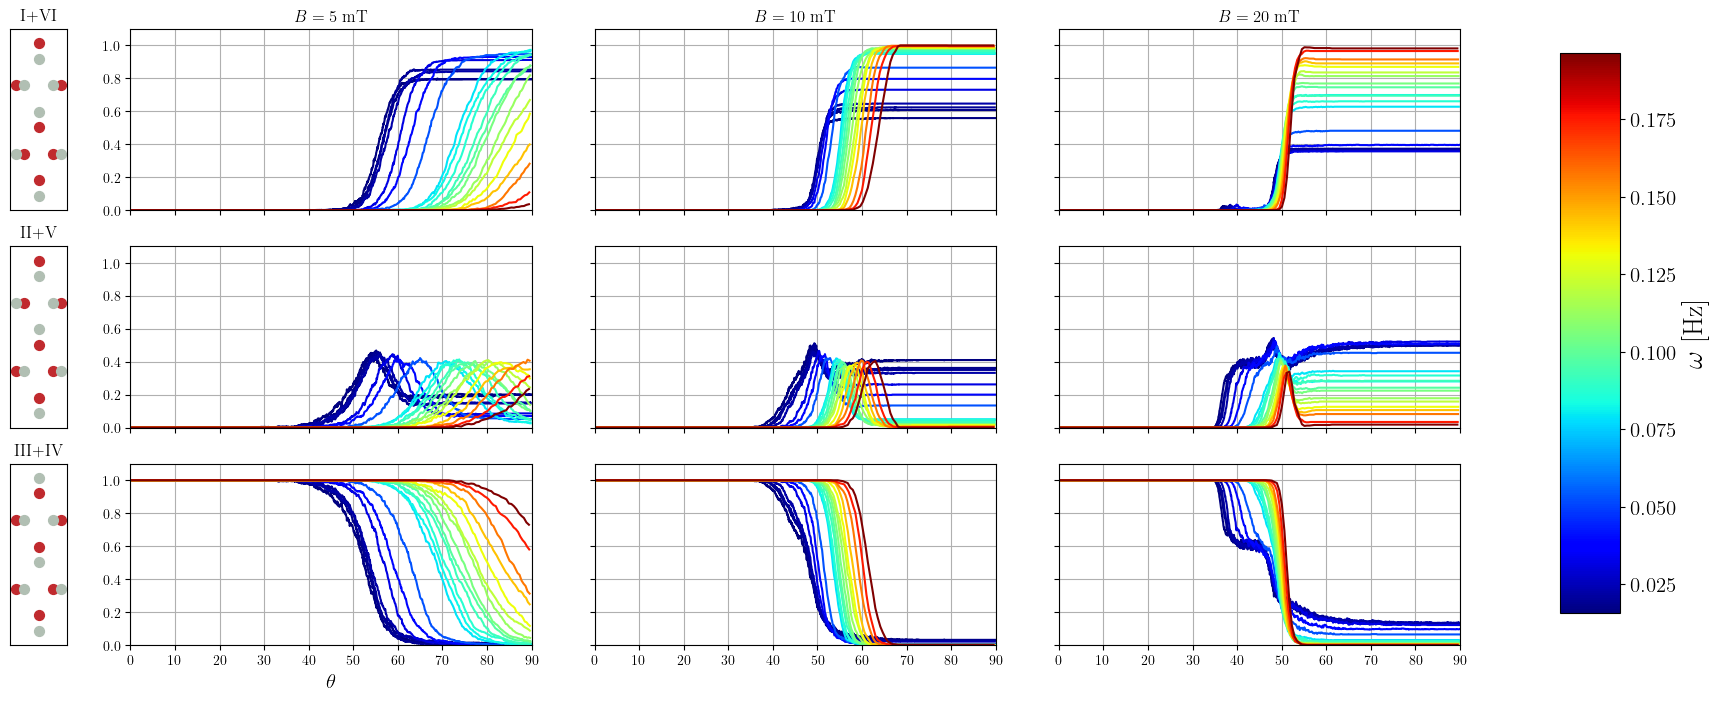

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 8),
                         gridspec_kw={
                           'width_ratios': [1, 7, 7 ,7],
                           'height_ratios': [1, 1, 1],
                           'wspace': 0.2,
                           'hspace': 0.2})

norm = plt.Normalize(min(ws),max(ws))
cmap = plt.get_cmap('jet')

field_values = [5,10,20]

for j,B in enumerate(field_values):
    # here j selects the column in which it is going to be plotted
    for i,(w,cdf_w) in enumerate(raw_data.groupby('omega')):
        if w not in ws:
            continue
        else:
            cdf_wB = cdf_w.xs(B,level='field')
            axes[0][j+1].plot(cdf_wB.theta*180/np.pi,cdf_wB.I + cdf_wB.VI, color = cmap(norm(w)))
            axes[0][j+1].set_title(f'$B = {B}$ mT')
            
            axes[1][j+1].plot(cdf_wB.theta*180/np.pi,cdf_wB.II + cdf_wB.V, color = cmap(norm(w)))
            
            axes[2][j+1].plot(cdf_wB.theta*180/np.pi,cdf_wB.III + cdf_wB.IV, color = cmap(norm(w)))

plot_simple_colloids(axes[0][0],'I+VI',centers,af4)
plot_simple_colloids(axes[1][0],'II+V',centers,af2)
plot_simple_colloids(axes[2][0],'III+IV',centers,zero)

# set the grids
for i in range(3):
    for j in range(1,4):
        axes[i][j].grid()
        axes[i][j].set_ylim(0,1.1)
        axes[i][j].set_xlim(0,90)
        
        if i<2:
            axes[i][j].set_xticklabels([])
        if j>1: 
            axes[i][j].set_yticklabels([])

axes[2][1].set_xlabel('$\\theta$',fontsize=15)

fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # [left, bottom, width, height] for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='$\\omega$ [Hz]',fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.show()


## Vertex counting

In [33]:
# here i want to know which is the top time for any given omega value
# since it does not reach the total_time stuff
omega_time = {w:df_w.index.get_level_values('time').max() for w,df_w in raw_data.groupby('omega')}
omegas = list(omega_time.keys())

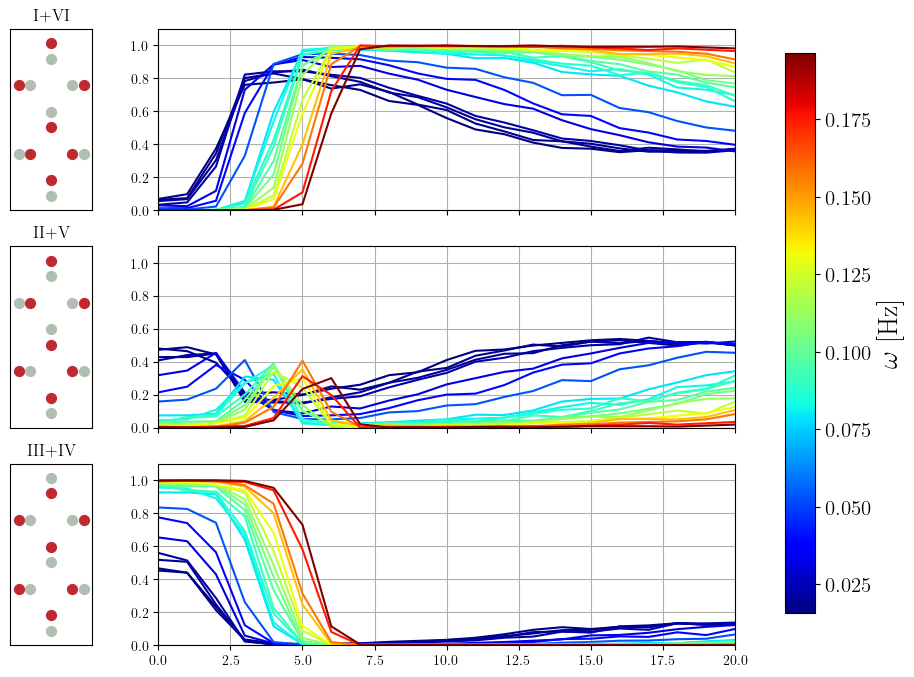

In [144]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8),
                         gridspec_kw={
                           'width_ratios': [1, 7,],
                           'height_ratios': [1, 1, 1],
                           'wspace': 0.2,
                           'hspace': 0.2})

norm = plt.Normalize(min(omegas),max(ws))
cmap = plt.get_cmap('jet')

plot_simple_colloids(axes[0][0],'I+VI',centers,af4)
plot_simple_colloids(axes[1][0],'II+V',centers,af2)
plot_simple_colloids(axes[2][0],'III+IV',centers,zero)

# group by omegas
for w, cdf_omega in raw_data.groupby('omega'):
    if w not in ws:
            continue
    
    # then for some omega, select the last time in the simulation
    # this is done by putting the omega back in the dictionary
    # this gives a field series, then sort it by increasing field
    cdf_last = cdf_omega.xs(omega_time[w],level='time').sort_index()
    axes[0][1].plot(cdf_last.index.get_level_values('field'), cdf_last.I + cdf_last.VI, color=cmap(norm(w)) )
    axes[1][1].plot(cdf_last.index.get_level_values('field'), cdf_last.II + cdf_last.V, color=cmap(norm(w)) )
    axes[2][1].plot(cdf_last.index.get_level_values('field'), cdf_last.III + cdf_last.IV, color=cmap(norm(w)) )

for i in range(3):
    axes[i][1].set_xlim(0,20)
    axes[i][1].set_ylim(0,1.1)
    axes[i][1].grid()
    
    if i<2:
        axes[i][1].set_xticklabels([])


    
fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # [left, bottom, width, height] for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='$\\omega$ [Hz]',fontsize=20)
cbar.ax.tick_params(labelsize=15)
   
plt.show()

# Area vs omega

In [39]:
def get_intersection(fields,x,tol=0.01):
    last = x[-1]
    
    for i,xi in enumerate(x[:-1]):
        diff = np.abs(xi-last) 
        if diff<tol:
            done=True
            return i
def areabcurves(x,y):
    idx = get_intersection(x, y)

    dx = x[1] - x[0]
    y2 = test[idx:]
    y1 = [y2[0] for i in range(len(y2))]
    x = fields[idx:]

    return np.trapz(y2,x,dx=dx) - np.trapz(y1,x,dx=x)

In [140]:
from scipy.interpolate import CubicSpline, BSpline
def smooth_mesh(x,y):
    cs = CubicSpline(x,y)
    #cs = BSpline(x,y,k=1)
    h=0.0001
    newmesh = np.arange(0,20+h,h)
    return newmesh, cs(newmesh)

def smooth_areas(x,y):
    newx, newy = smooth_mesh(x,y)
    idx = get_intersection(newx,newy,tol=0.0001)

    base = newx[-1]-newx[idx]
    return np.trapz(newy[idx:],newx[idx:], dx=newx[1]-newx[0]) - base*newy[idx]


In [141]:
# each dictionary will have the key,value pair
# omega : addition of vrt for last frame 
IpVI = dict() 
IIpV = dict()
IIIpIV = dict() 

for w, cdf_omega in raw_data.groupby('omega'):
    
    # again, get the last frame for all fields
    cdf_last = cdf_omega.xs(omega_time[w],level='time').sort_index()
    
    field = cdf_last.index.get_level_values('field').to_list()
    
    # save the addition for all fields
    IpVI[w] = (cdf_last.I + cdf_last.VI).to_list()
    IIpV[w] = (cdf_last.II + cdf_last.V).to_list()
    IIIpIV[w] = (cdf_last.III + cdf_last.IV).to_list()
 


Here I want from the data get an interpolationof the function to get a more points, bc sometimes there is not a point in the original data that intersects the line.

In [142]:
omegas = list(IpVI.keys())
fields = raw_data.index.get_level_values('field').unique().to_list()
fields = np.sort(fields)
test = IpVI[omegas[-1]]

a1p6 = [smooth_areas(fields,IpVI[w]) for w in omegas]
a2p5 = [smooth_areas(fields,IIpV[w]) for w in omegas]
a3p4 = [smooth_areas(fields,IIIpIV[w]) for w in omegas]

#idx = get_intersection(fields, test)
#idx

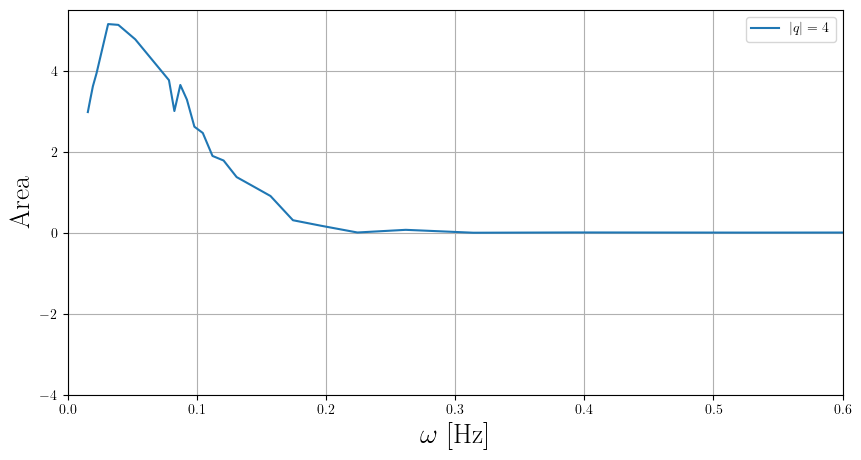

In [147]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(omegas, a1p6, label = '$|q|=4$')
#ax.plot(omegas, a2p5, label = '$|q|=2$')
#ax.plot(omegas, a3p4, label = '$|q|=0$')

ax.set_xlim(0,0.6)
ax.set_xlabel('$\\omega$ [Hz]', fontsize=20)

ax.set_ylim(-4,5.5)
ax.set_ylabel('Area', fontsize=20)
ax.grid()
ax.legend()

plt.show()

# Sanity check


In [146]:
print(omegas)

[0.0157, 0.0175, 0.0196, 0.0224, 0.0314, 0.0393, 0.0524, 0.0785, 0.0827, 0.0873, 0.0924, 0.0982, 0.1047, 0.1122, 0.1208, 0.1309, 0.1428, 0.1571, 0.1745, 0.1963, 0.2244, 0.2618, 0.3142, 0.3927, 0.5236, 0.7854, 1.5708]


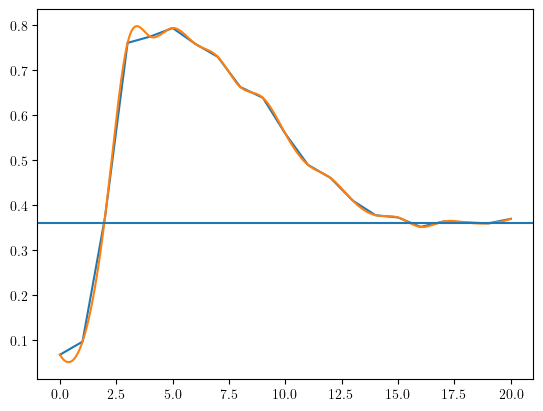

In [145]:
test = IpVI[omegas[0]]
newx, newy = smooth_mesh(fields,test)

idx = get_intersection(newx,newy)

plt.plot(fields,test)
plt.plot(newx,newy)
plt.axhline(newy[idx])

# Only one stuff

In [11]:
all_times = raw_data['total_time'].unique()

In [12]:
to_look = 3
local_counts = counts[counts.total_time == to_look].xs(17,level='field').drop('total_time',axis=1)
time = local_counts.index.to_list()

local_counts['1p6'] = local_counts['I'] + local_counts['VI']
local_counts['1m6'] = (local_counts['I'] - local_counts['VI'])/(local_counts['1p6'] + 0.00001)

local_counts['2p5'] = local_counts['II'] + local_counts['V']
local_counts['2m5'] = (local_counts['II'] - local_counts['V'])/(local_counts['2p5'] + 0.00001)

local_counts['3p4'] = local_counts['III'] + local_counts['IV']
local_counts['3m4'] = (local_counts['III'] - local_counts['IV'])/(local_counts['3p4'] + 0.00001)

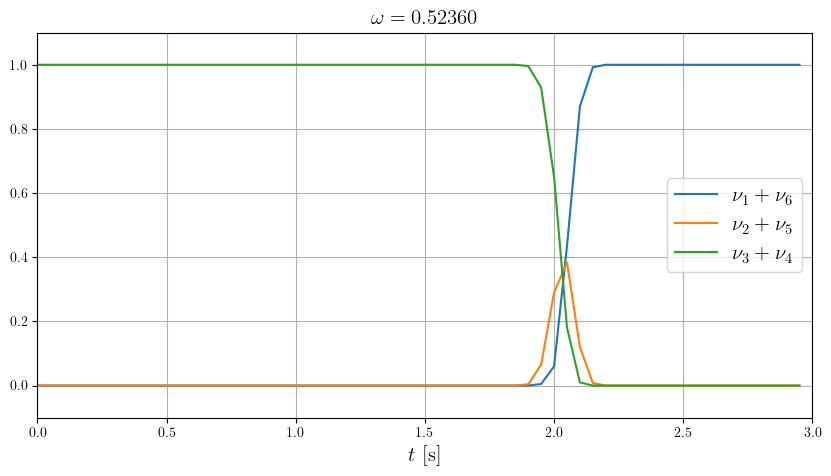

In [13]:
colors = ['#2200cf','#606cff', '#00a92a', '#5d6061', '#ff514c','#ca0600'  ]

fig, ax = plt.subplots(figsize=(10,5))
for i, vtp in enumerate(types2[:3]):
    ax.plot(time, local_counts[vtp] , label=types_fancy[i])
ax.set_ylim(-0.1,1.1)
ax.set_xlim(0,to_look)
ax.set_xlabel('$t$ [s]',fontsize=15)
ax.set_title(f'$\\omega = {np.pi/2/to_look:1.5f}$',fontsize=15)
ax.legend(fontsize=15)
ax.grid()